<div style="border-radius:10px; padding: 30px; background-color: #ff69b4; font-size:90%; text-align:left">
<p style="font-family:Georgia; font-size:300%;font-weight:bold;text-align:center;color:black;"> 📱Phone Price Prediction💲 </p>
    
<p style="font-family:newtimeroman; font-size:200%;font-weight:bold;text-align:center;color:black;"> 📉 Decision Tree (DT), Random Forest (RF) & Support Vector Machine (SVM)📈</p>
    
<p style="font-family:newtimeroman; font-size:200%;font-weight:bold;text-align:center;color:black;">Coder : Sara Zahmatkesh 👩🏻‍🏫💻</p> </div> 

In [1]:
import pandas as pd                                 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv ('train.csv')
data

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

# Data Information 

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">

**battery_power:** total energy a battery can store in one time measured in mAh
    
**blue:** has bluetooth or not 
    
**clock_speed:** speed at which microprocessor executes instructions 
    
**dual_sim:** Has dual sim support or not 
    
**fc:** Front Camera mega pixel 

**four_g:** Has 4G or not 

**int_memory:** Internal Memory in Gigabytes 

**m_dep:** Mobile Depth in cm 

**mobile_wt:** Weight of Mobile Phone 

**n_cores:** Number of cores of processor 

**pc:** Promary Camera mega pixels

**px_height:**  Pixel Resolution Height 

**px_width:** Pixel Resolution Width 

**ram:** Random Access Memory in Mega Bytes 

**Sc_h:** Screen height of mobile in cm 

**Sc_w:** Screen width of mobile in cm 

**talk_time:** longest time that a single battery charge will last when you are 

**three_g:** Has 3G or not 

**touch_screen:** Has touch screen or not 

**wifi:** Has wifi or not 

**price_range:** This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost), and 3(very high cost). 


In [3]:
DF = pd.DataFrame (data)
DF.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">
    
**Let's analyze the data, we have a combination of continuous, categorical, and binary data**

    
**Continuous:** 
    
- battery_power
- clock_speed 
- mobile_wt
- int_memory
- px_height
- px_width 
- m_depth 
- ram 
- talk_time 
- sc_h 
- sc_w 

**Categorical:**
- fc 
- n_cores 
- pc 
- price_range 

**Binary:**
- blue
- dual_sim
- four_g 
- three_g 
- touch_screen 
- wifi 



<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">
    
<span style="color:blue">**After checking min, max, and description of data, 2 columns need more study.** 

px_height: min is 0 for camera pixel height !

sc_w: min is 0 for screen width !

In [5]:
DF.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">
   
**There is no 'objet' type column. and no NaN**

In [6]:
DF2 = DF[DF['sc_w'] == 0]  #recognize data with pixel width of 0 ! They are wrong data, because the device has screen height! 
DF2

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
12             1815     0          2.8         0   2       0          33   
24              503     0          1.2         1   5       1           8   
33             1310     1          2.2         1   0       1          51   
42             1253     1          0.5         1   5       1           5   
50             1547     1          3.0         1   2       1          14   
...             ...   ...          ...       ...  ..     ...         ...   
1918            772     0          1.0         1   0       1          23   
1920            591     1          0.5         1   1       1          16   
1946            590     1          1.2         1   0       0          32   
1954            686     1          2.7         1   0       0          36   
1981           1454     0          2.6         0   8       0           6   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
12      0.6        159        4  ...        607       748  1482    18     0   
24      0.4        111        3  ...        201      1245  2583    11     0   
33      0.6        100        4  ...        178      1919  3845     7     0   
42      0.2        152        2  ...        685       714  1878    15     0   
50      0.7        198        3  ...       1042      1832  2059     5     0   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1918    0.6         97        7  ...        317      1805  2782     7     0   
1920    0.9         90        6  ...        892      1603  3746     5     0   
1946    0.4        141        6  ...        227       509  1817    10     0   
1954    0.1        194        4  ...         64       745  1503    10     0   
1981    0.4        199        3  ...        698      1018  1300    10     0   

      talk_time  three_g  touch_screen  wifi  price_range  
12            2        1             0     0            1  
24           12        1             0     0            1  
33           12        1             1     0            3  
42            4        1             1     0            1  
50           15        1             0     1            2  
...         ...      ...           ...   ...          ...  
1918         17        1             0     0            2  
1920          5        1             1     0            3  
1946          6        0             1     0            0  
1954         13        0             0     0            0  
1981          2        0             0     1            1  

[180 rows x 21 columns]

In [7]:
DF3 = DF[DF['px_height'] == 0]  #pixel height cannot be 0, these are wrong data 
DF3

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1481           1834     0          2.1         0   7       1          40   
1933            897     1          2.0         0   3       1           2   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1481    0.1         99        4  ...          0      1987  3692    13     0   
1933    0.6        154        8  ...          0       994  1958     7     5   

      talk_time  three_g  touch_screen  wifi  price_range  
1481         16        1             1     0            3  
1933          7        1             1     0            1  

[2 rows x 21 columns]

In [8]:
condition = (DF['sc_w'] == 0) | (DF['px_height'] == 0)      # Combine conditions into a single boolean mask

DF_cleaned = DF[~condition]                                # Drop rows matching the condition
DF_cleaned.reset_index(drop=True, inplace=True)
DF_cleaned

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1814            794     1          0.5         1   0       1           2   
1815           1965     1          2.6         1   0       0          39   
1816           1911     0          0.9         1   1       1          36   
1817           1512     0          0.9         0   4       1          46   
1818            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1814    0.8        106        6  ...       1222      1890   668    13     4   
1815    0.2        187        4  ...        915      1965  2032    11    10   
1816    0.7        108        8  ...        868      1632  3057     9     1   
1817    0.1        145        5  ...        336       670   869    18    10   
1818    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1814         19        1             1     0            0  
1815         16        1             1     1            2  
1816          5        1             1     0            3  
1817         19        1             1     1            0  
1818          2        1             1     1            3  

[1819 rows x 21 columns]

In [9]:
DF_cleaned.describe()

battery_power         blue  clock_speed     dual_sim           fc  \
count    1819.000000  1819.000000  1819.000000  1819.000000  1819.000000   
mean     1238.031336     0.503573     1.519406     0.504673     4.319956   
std       439.989288     0.500125     0.813975     0.500116     4.355982   
min       501.000000     0.000000     0.500000     0.000000     0.000000   
25%       845.000000     0.000000     0.700000     0.000000     1.000000   
50%      1231.000000     1.000000     1.500000     1.000000     3.000000   
75%      1611.000000     1.000000     2.200000     1.000000     7.000000   
max      1998.000000     1.000000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  1819.000000  1819.000000  1819.000000  1819.000000  1819.000000  ...   
mean      0.524464    32.156130     0.499835   140.578340     4.531061  ...   
std       0.499538    18.105723     0.288875    35.437231     2.288705  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     5.000000  ...   
75%       1.000000    48.000000     0.800000   170.500000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  1819.000000  1819.000000  1819.000000  1819.000000  1819.000000   
mean    647.086861  1252.828477  2133.468939    12.488730     6.338098   
std     444.741154   432.418889  1087.488721     4.166008     4.153085   
min       1.000000   500.000000   256.000000     5.000000     1.000000   
25%     284.000000   877.000000  1203.500000     9.000000     3.000000   
50%     562.000000  1251.000000  2175.000000    13.000000     6.000000   
75%     952.000000  1633.000000  3072.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  1819.000000  1819.000000   1819.000000  1819.000000  1819.000000  
mean     11.009346     0.760858      0.507422     0.513469     1.509621  
std       5.456642     0.426677      0.500082     0.499956     1.119529  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     1.000000  
50%      11.000000     1.000000      1.000000     1.000000     2.000000  
75%      16.000000     1.000000      1.000000     1.000000     3.000000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

# Data Preprocessing 

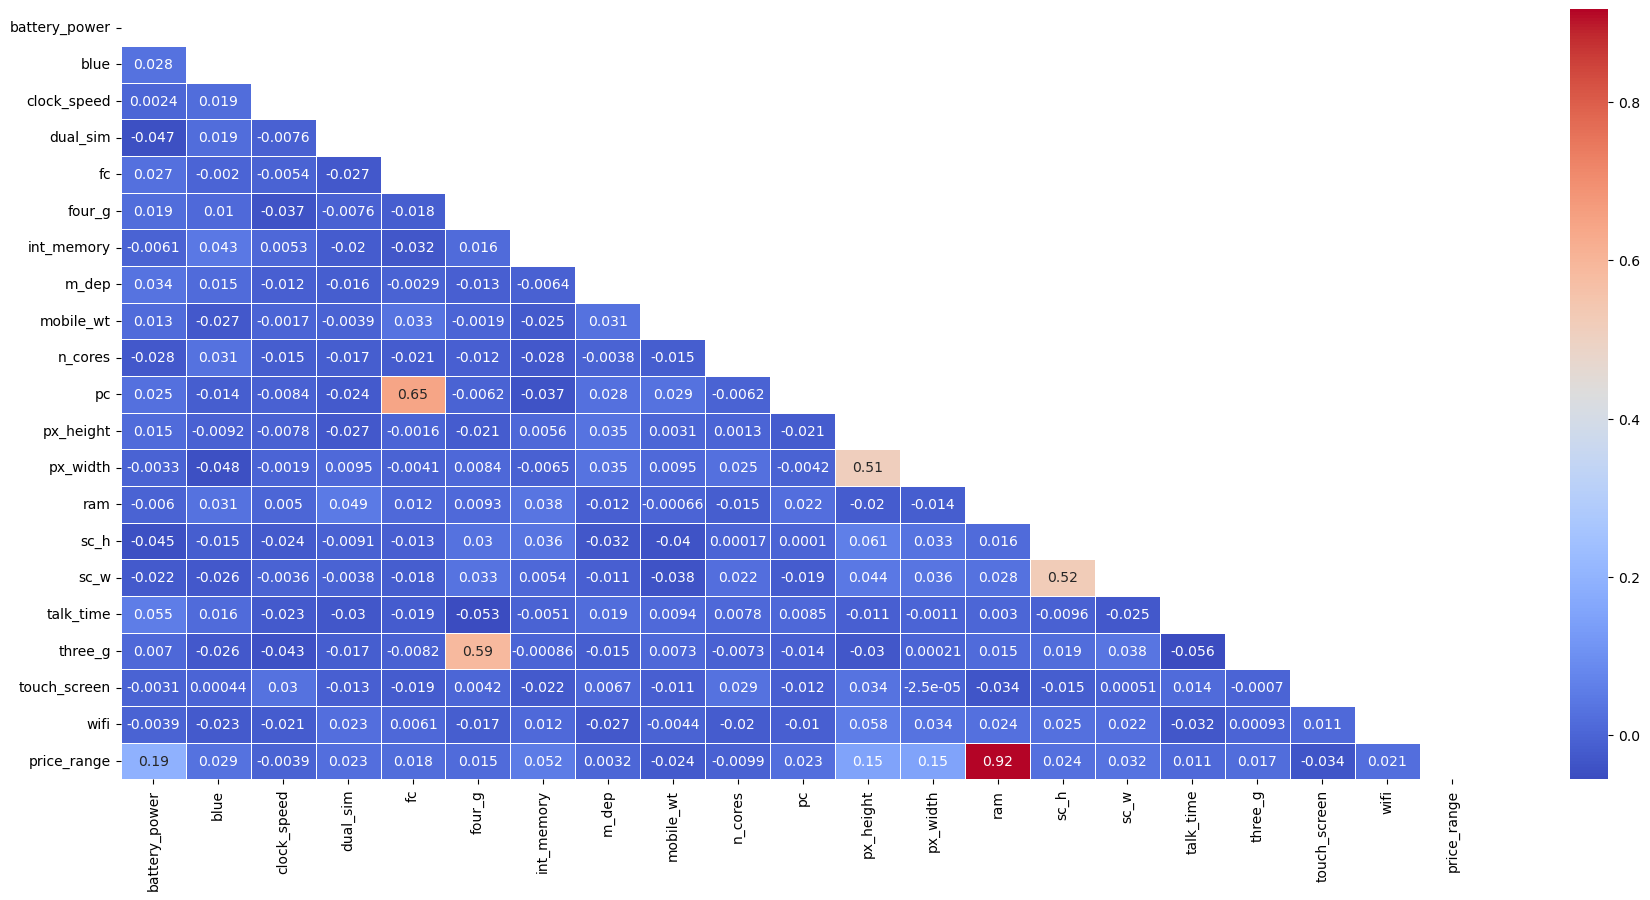

In [10]:
plt.figure(figsize=(22,10))                 # correlation between features 
sns.heatmap(DF_cleaned.corr(numeric_only=True), annot=True,linewidth=.5,cmap="coolwarm",mask=np.triu(DF_cleaned.corr(numeric_only=True)));

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">

**The above correlation heatmap says that:**

1- The most influential factor on the price is "ram" 

2- Then "battery_power" is influential 

3- Then "pixels height and width" are also important 

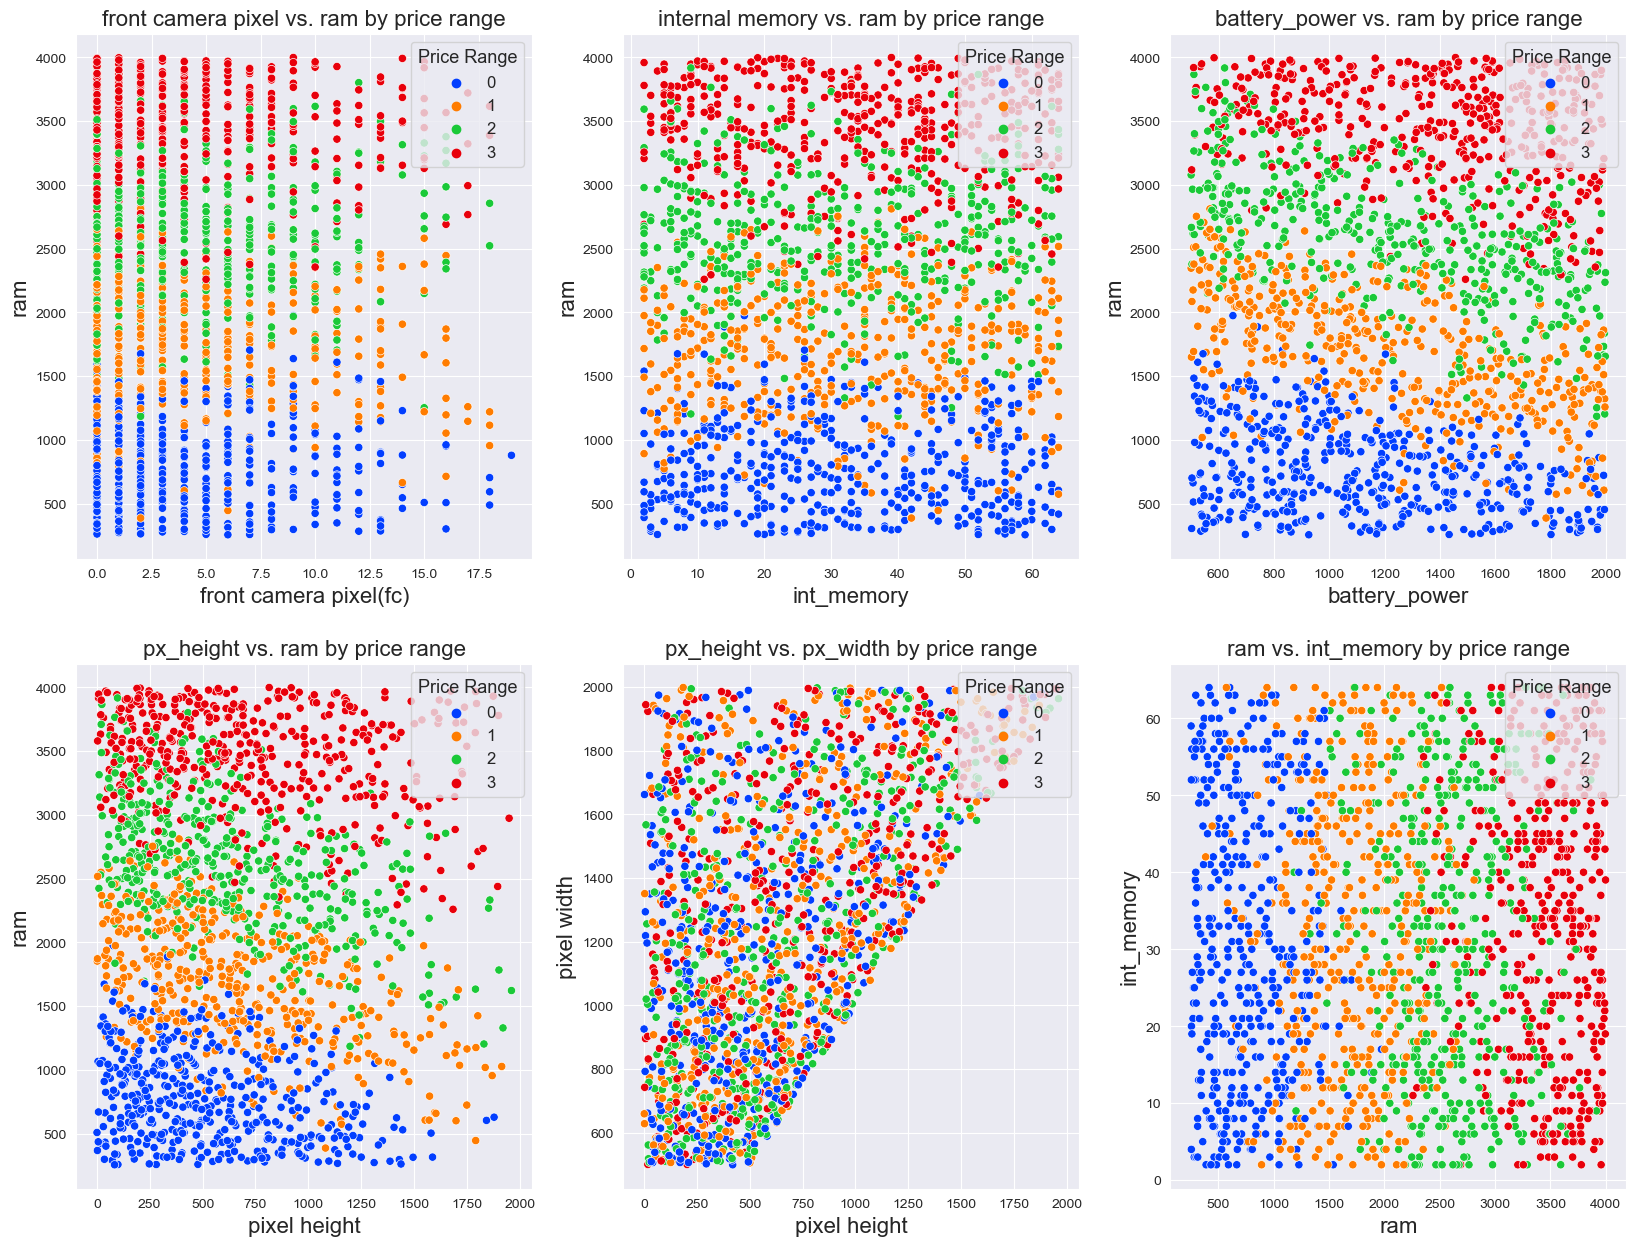

In [11]:
sns.set_style('darkgrid')

# Create a 2x3 subplot grid
fig, axs = plt.subplots(2, 3, figsize=(20, 15))

# Scatter plot with hue set to 'price_range'
sns.scatterplot(x='fc', y='ram', hue='price_range', data=DF_cleaned, ax=axs[0, 0], palette='bright')
axs[0, 0].set_title('front camera pixel vs. ram by price range', fontsize =16)
axs[0, 0].set_xlabel('front camera pixel(fc)', fontsize =16)
axs[0, 0].set_ylabel('ram', fontsize =16)

sns.scatterplot(x='int_memory', y='ram', hue='price_range', data=DF_cleaned, ax=axs[0, 1], palette='bright')
axs[0, 1].set_title('internal memory vs. ram by price range', fontsize =16)
axs[0, 1].set_xlabel('int_memory', fontsize =16)
axs[0, 1].set_ylabel('ram', fontsize =16)

sns.scatterplot(x='battery_power', y='ram', hue='price_range', data=DF_cleaned, ax=axs[0, 2], palette='bright')
axs[0, 2].set_title('battery_power vs. ram by price range', fontsize =16)
axs[0, 2].set_xlabel('battery_power', fontsize =16)
axs[0, 2].set_ylabel('ram', fontsize =16)

sns.scatterplot(x='px_height', y='ram', hue='price_range', data=DF_cleaned, ax=axs[1, 0], palette='bright')
axs[1, 0].set_title('px_height vs. ram by price range', fontsize =16)
axs[1, 0].set_xlabel('pixel height', fontsize =16)
axs[1, 0].set_ylabel('ram', fontsize =16)

sns.scatterplot(x='px_height', y='px_width', hue='price_range', data=DF_cleaned, ax=axs[1, 1], palette='bright')
axs[1, 1].set_title('px_height vs. px_width by price range', fontsize =16)
axs[1, 1].set_xlabel('pixel height', fontsize =16)
axs[1, 1].set_ylabel('pixel width', fontsize =16)

sns.scatterplot(x='ram', y='int_memory', hue='price_range', data=DF_cleaned, ax=axs[1, 2], palette='bright')
axs[1, 2].set_title('ram vs. int_memory by price range', fontsize =16)
axs[1, 2].set_xlabel('ram', fontsize =16)
axs[1, 2].set_ylabel('int_memory', fontsize =16)


# Adjust legend location
for ax in axs.flat:
    ax.legend(loc='upper right', title='Price Range', fontsize=12, title_fontsize='13')

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">
    
**"ram" is showing a good classification as the most influential feature**
    
**The above scatter plots represents the best classification in the data among the most powerful features.**

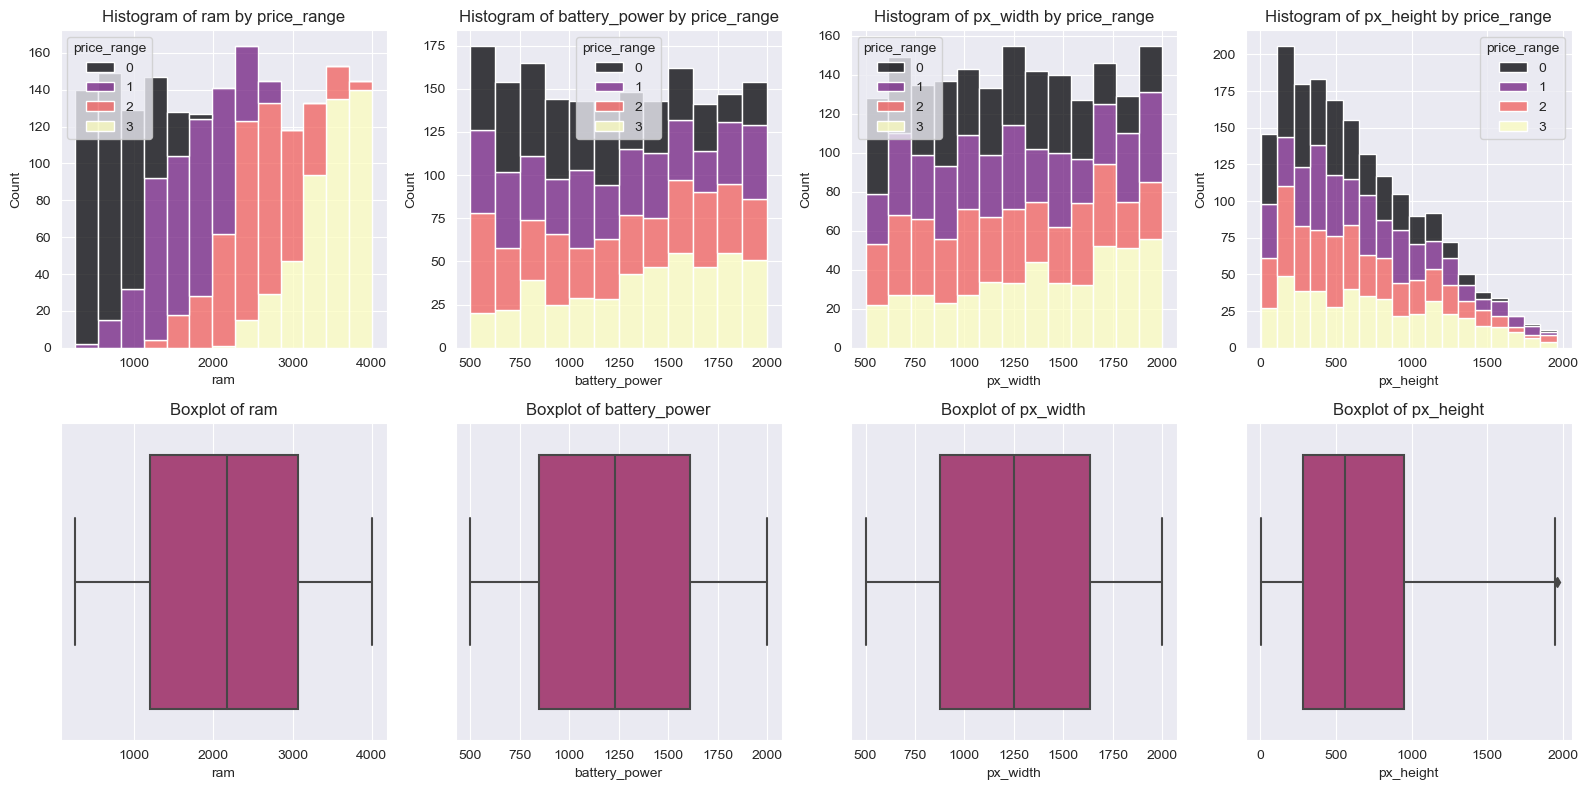

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_style('darkgrid')
# Define a list of column names with maximum correlations
list_of_columns = ['ram', 'battery_power', 'px_width', 'px_height']

# Create a subplot grid with 2 columns and a number of rows equal to the number of columns to visualize
fig, axs = plt.subplots(2, len(list_of_columns), figsize=(16, 8))

# Loop through each column name, using 'enumerate' to get both the column name and the loop index
for i, columns_name in enumerate(list_of_columns):
    # Plot a histogram for each column, with data segmented by 'price_range' status
    sns.histplot(data=DF_cleaned, x=columns_name, hue='price_range',
                 multiple='stack', palette='magma', ax=axs[0, i])
    
    # Set the title for each histogram to indicate what data it represents
    axs[0, i].set_title(f'Histogram of {columns_name} by price_range')
    
    # Plot a boxplot for each column to show the distribution of values
    sns.boxplot(data=DF_cleaned, x=columns_name, palette='magma', ax=axs[1, i])
    
    # Set the title for each boxplot to indicate what data it represents
    axs[1, i].set_title(f'Boxplot of {columns_name}')

# Adjust the layout of the subplots to prevent any overlapping of elements
plt.tight_layout()

# Display the plots
plt.show()

# Reset the warning filter to default to ensure that future warnings are not suppressed
warnings.simplefilter(action='default', category=FutureWarning)

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">

**ram:** Uniform distribution for all price classes; symmetrical with no outliers.

**battery power:** Varied distribution, similar to ram; symmetrical. There are more data for classes with lower prices. 

**px_width:** has a wide distribution. 

**px_height:** Chi-Squared distribution. There is sparse ouliers at the end of distribution. it is positively skewed. 


<span style="color:blue"> **Major obseravations:** 
    
- The most 4 influential features have normal distribution. 
- larger ram capacity leads to higher price. 

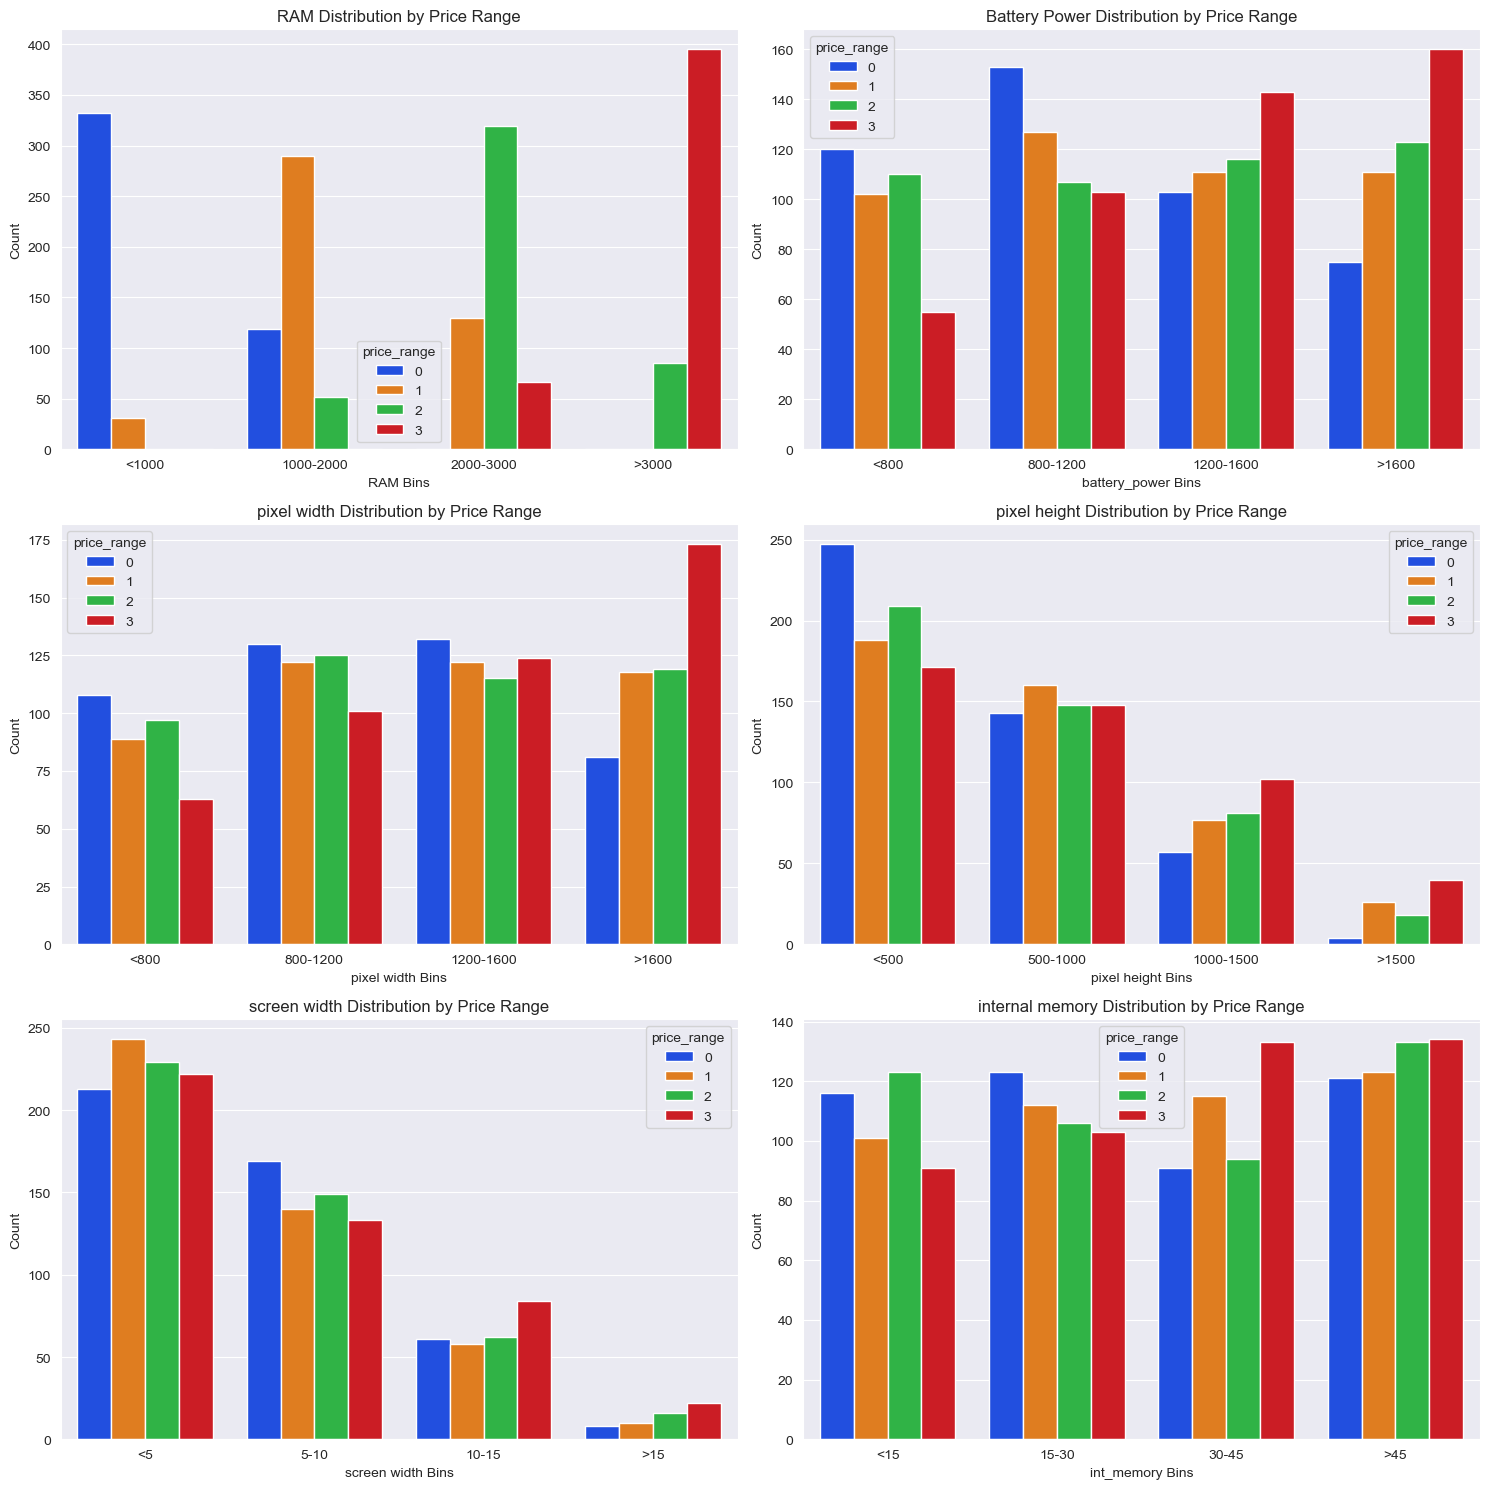

In [13]:
sns.set_style('darkgrid')

DF_cleaned2 = DF_cleaned.copy()
# Create a figure with 6 subplots in 3 rows and 2 columns
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

ram_bins = [-float('inf'), 1000, 2000, 3000, float('inf')]
ram_labels = ['<1000', '1000-2000', '2000-3000', '>3000']
# Bin the 'ram' values using .loc to avoid the warning
DF_cleaned2.loc[:, 'ram_bin'] = pd.cut(DF_cleaned2['ram'], bins=ram_bins, labels=ram_labels)
# Plotting the barplot for the 'ram' bins
sns.countplot(data=DF_cleaned2, x='ram_bin', hue='price_range', palette='bright', ax=axs[0, 0])
axs[0, 0].set_title('RAM Distribution by Price Range')
axs[0, 0].set_xlabel('RAM Bins')
axs[0, 0].set_ylabel('Count')

batt_bins = [-float('inf'), 800, 1200, 1600, float('inf')]
batt_labels = ['<800', '800-1200', '1200-1600', '>1600']
# Bin the 'battery power' values using .loc to avoid the warning
DF_cleaned2.loc[:, 'batt_bin'] = pd.cut(DF_cleaned2['battery_power'], bins=batt_bins, labels=batt_labels)
# Plotting the barplot for the 'battery power' bins
sns.countplot(data=DF_cleaned2, x='batt_bin', hue='price_range', palette='bright', ax=axs[0, 1])
axs[0, 1].set_title('Battery Power Distribution by Price Range')
axs[0, 1].set_xlabel('battery_power Bins')
axs[0, 1].set_ylabel('Count')

pxw_bins = [-float('inf'), 800, 1200, 1600, float('inf')]
pxw_labels = ['<800', '800-1200', '1200-1600', '>1600']
# Bin the 'pixel width' values using .loc to avoid the warning
DF_cleaned2.loc[:, 'pxw_bin'] = pd.cut(DF_cleaned2['px_width'], bins=pxw_bins, labels=pxw_labels)
# Plotting the barplot for the 'pixel width' bins
sns.countplot(data=DF_cleaned2, x='pxw_bin', hue='price_range', palette='bright', ax=axs[1, 0])
axs[1, 0].set_title('pixel width Distribution by Price Range')
axs[1, 0].set_xlabel('pixel width Bins')
axs[1, 0].set_ylabel('Count')

pxh_bins = [-float('inf'), 500, 1000, 1500, float('inf')]
pxh_labels = ['<500', '500-1000', '1000-1500', '>1500']
# Bin the 'pixel height' values using .loc to avoid the warning
DF_cleaned2.loc[:, 'pxh_bin'] = pd.cut(DF_cleaned2['px_height'], bins=pxh_bins, labels=pxh_labels)
# Plotting the barplot for the 'pixel height' bins
sns.countplot(data=DF_cleaned2, x='pxh_bin', hue='price_range', palette='bright', ax=axs[1, 1])
axs[1, 1].set_title('pixel height Distribution by Price Range')
axs[1, 1].set_xlabel('pixel height Bins')
axs[1, 1].set_ylabel('Count')

scw_bins = [-float('inf'), 5, 10, 15, float('inf')]
scw_labels = ['<5', '5-10', '10-15', '>15']
# Bin the 'screen width' values using .loc to avoid the warning
DF_cleaned2.loc[:, 'scw_bin'] = pd.cut(DF_cleaned2['sc_w'], bins=scw_bins, labels=scw_labels)
# Plotting the barplot for the 'screen width' bins
sns.countplot(data=DF_cleaned2, x='scw_bin', hue='price_range', palette='bright', ax=axs[2, 0])
axs[2, 0].set_title('screen width Distribution by Price Range')
axs[2, 0].set_xlabel('screen width Bins')
axs[2, 0].set_ylabel('Count')

intm_bins = [-float('inf'), 15, 30, 45, float('inf')]
intm_labels = ['<15', '15-30', '30-45', '>45']
# Bin the 'int_memory' values using .loc to avoid the warning
DF_cleaned2.loc[:, 'intm_bin'] = pd.cut(DF_cleaned2['int_memory'], bins=intm_bins, labels=intm_labels)
# Plotting the barplot for the 'int_memory' bins
sns.countplot(data=DF_cleaned2, x='intm_bin', hue='price_range', palette='bright', ax=axs[2, 1])
axs[2, 1].set_title('internal memory Distribution by Price Range')
axs[2, 1].set_xlabel('int_memory Bins')
axs[2, 1].set_ylabel('Count')

# Display the plot
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">
    
**Applying bins for ploting barplots of continuous data gives valueable information:**
    
 - in ram distribution and battery_power, The margings in input features define "class 3" prediction very well. 
 - "class 3" price increases and decreases with features changing very smooth, while other price classes have anomaly. 
 - by vuslualizing these trends we can have a good understanding of the features changing. 
    

# Machine Learning Algorithms 

<div style="border-radius:10px; padding: 30px; background-color: #ff69b4; font-size:90%; text-align:left">
<p style="font-family:Georgia; font-size:300%;font-weight:bold;text-align:center;color:black;"> 🌳 Decision Tree Algorithm 🌳

<span style="color:brown">Normalizing the Features


In [36]:

X = DF_cleaned.drop(columns=['price_range'])   # drop the target
y = DF_cleaned['price_range']

# Normalize features
scaler = MinMaxScaler(feature_range = (0, 1))
norm_x = scaler.fit_transform(X)
X_norm = pd.DataFrame(norm_x, columns=list(X.columns))

# Split data into training and testing sets
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_norm, y, test_size=0.2, random_state=43)

list_of_criteria = ['gini', 'entropy', 'log_loss']
results = []

for criter in list_of_criteria:
    DT = DecisionTreeClassifier(criterion=criter, splitter='best', max_depth=None, min_samples_split=2, 
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                                random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                ccp_alpha=0.0)
    
    DT.fit(x_train1, y_train1)
    y_pred = DT.predict(x_test1)

    
    # Metrics
    accuracy = metrics.accuracy_score(y_test1, y_pred)
    precision = metrics.precision_score(y_test1, y_pred, average='weighted')
    recall = metrics.recall_score(y_test1, y_pred, average='weighted')
    
    results.append((criter, accuracy, precision, recall))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['criterion', 'Accuracy', 'Precision', 'Recall'])

# Sort and display results
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
display(results_df)

# Print best result
print(f'The best result is for {results_df["criterion"][0]} method which has an accuracy of {results_df["Accuracy"][0]:.4f}')


criterion  Accuracy  Precision    Recall
0   entropy  0.870879   0.871729  0.870879
1  log_loss  0.857143   0.856748  0.857143
2      gini  0.813187   0.812484  0.813187

The best result is for entropy method which has an accuracy of 0.8709


In [31]:
k_fold = KFold (6)
print (cross_val_score (DT, X, y.ravel(), cv = k_fold, n_jobs = 1))

[0.85855263 0.83168317 0.85808581 0.84818482 0.85478548 0.83168317]


<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">
    
**Cross Validation doesn't improve the Decision Tree model**

In [37]:
X_DT_best = DF_cleaned.drop(columns=['price_range'])   # drop the target
y_DT_best = DF_cleaned['price_range']

# Normalize features
scaler = MinMaxScaler(feature_range = (0, 1))
norm_x_DT_best = scaler.fit_transform(X_DT_best)
X_norm_DT_best = pd.DataFrame(norm_x_DT_best, columns=list(X_DT_best.columns))

# Split data into training and testing sets
x_train_DT_best, x_test_DT_best, y_train_DT_best, y_test_DT_best = train_test_split(X_norm_DT_best, y_DT_best, test_size=0.2, random_state=43)

DT_best = DecisionTreeClassifier(criterion="entropy", splitter='best', max_depth=None, min_samples_split=2, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                               random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                               ccp_alpha=0.0)
# Fit the Decision Tree classifier
DT_best.fit(x_train_DT_best, y_train_DT_best)

# Predict on the test set
y_pred_DT_best = DT_best.predict(x_test_DT_best)

# Print the results
accuracy_DT_best = metrics.accuracy_score(y_test_DT_best, y_pred_DT_best)
print(accuracy_DT_best)
    

0.8653846153846154


<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:centre" > 

<p style="font-family:Georgia; font-size:200%;font-weight:bold;text-align:center;color:black;"> Decision Tree Visulaization 👀 </p>    
    
    

In [38]:
from sklearn import tree 
text_representation = tree.export_text (DT)
print (text_representation)

|--- feature_13 <= 0.53
|   |--- feature_13 <= 0.28
|   |   |--- feature_0 <= 0.51
|   |   |   |--- feature_12 <= 0.74
|   |   |   |   |--- class: 0
|   |   |   |--- feature_12 >  0.74
|   |   |   |   |--- feature_13 <= 0.20
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_13 >  0.20
|   |   |   |   |   |--- feature_11 <= 0.22
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_11 >  0.22
|   |   |   |   |   |   |--- feature_0 <= 0.09
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  0.09
|   |   |   |   |   |   |   |--- class: 1
|   |   |--- feature_0 >  0.51
|   |   |   |--- feature_13 <= 0.21
|   |   |   |   |--- feature_11 <= 0.46
|   |   |   |   |   |--- feature_0 <= 0.89
|   |   |   |   |   |   |--- feature_12 <= 0.93
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_12 >  0.93
|   |   |   |   |   |   |   |--- feature_8 <= 0.26
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   

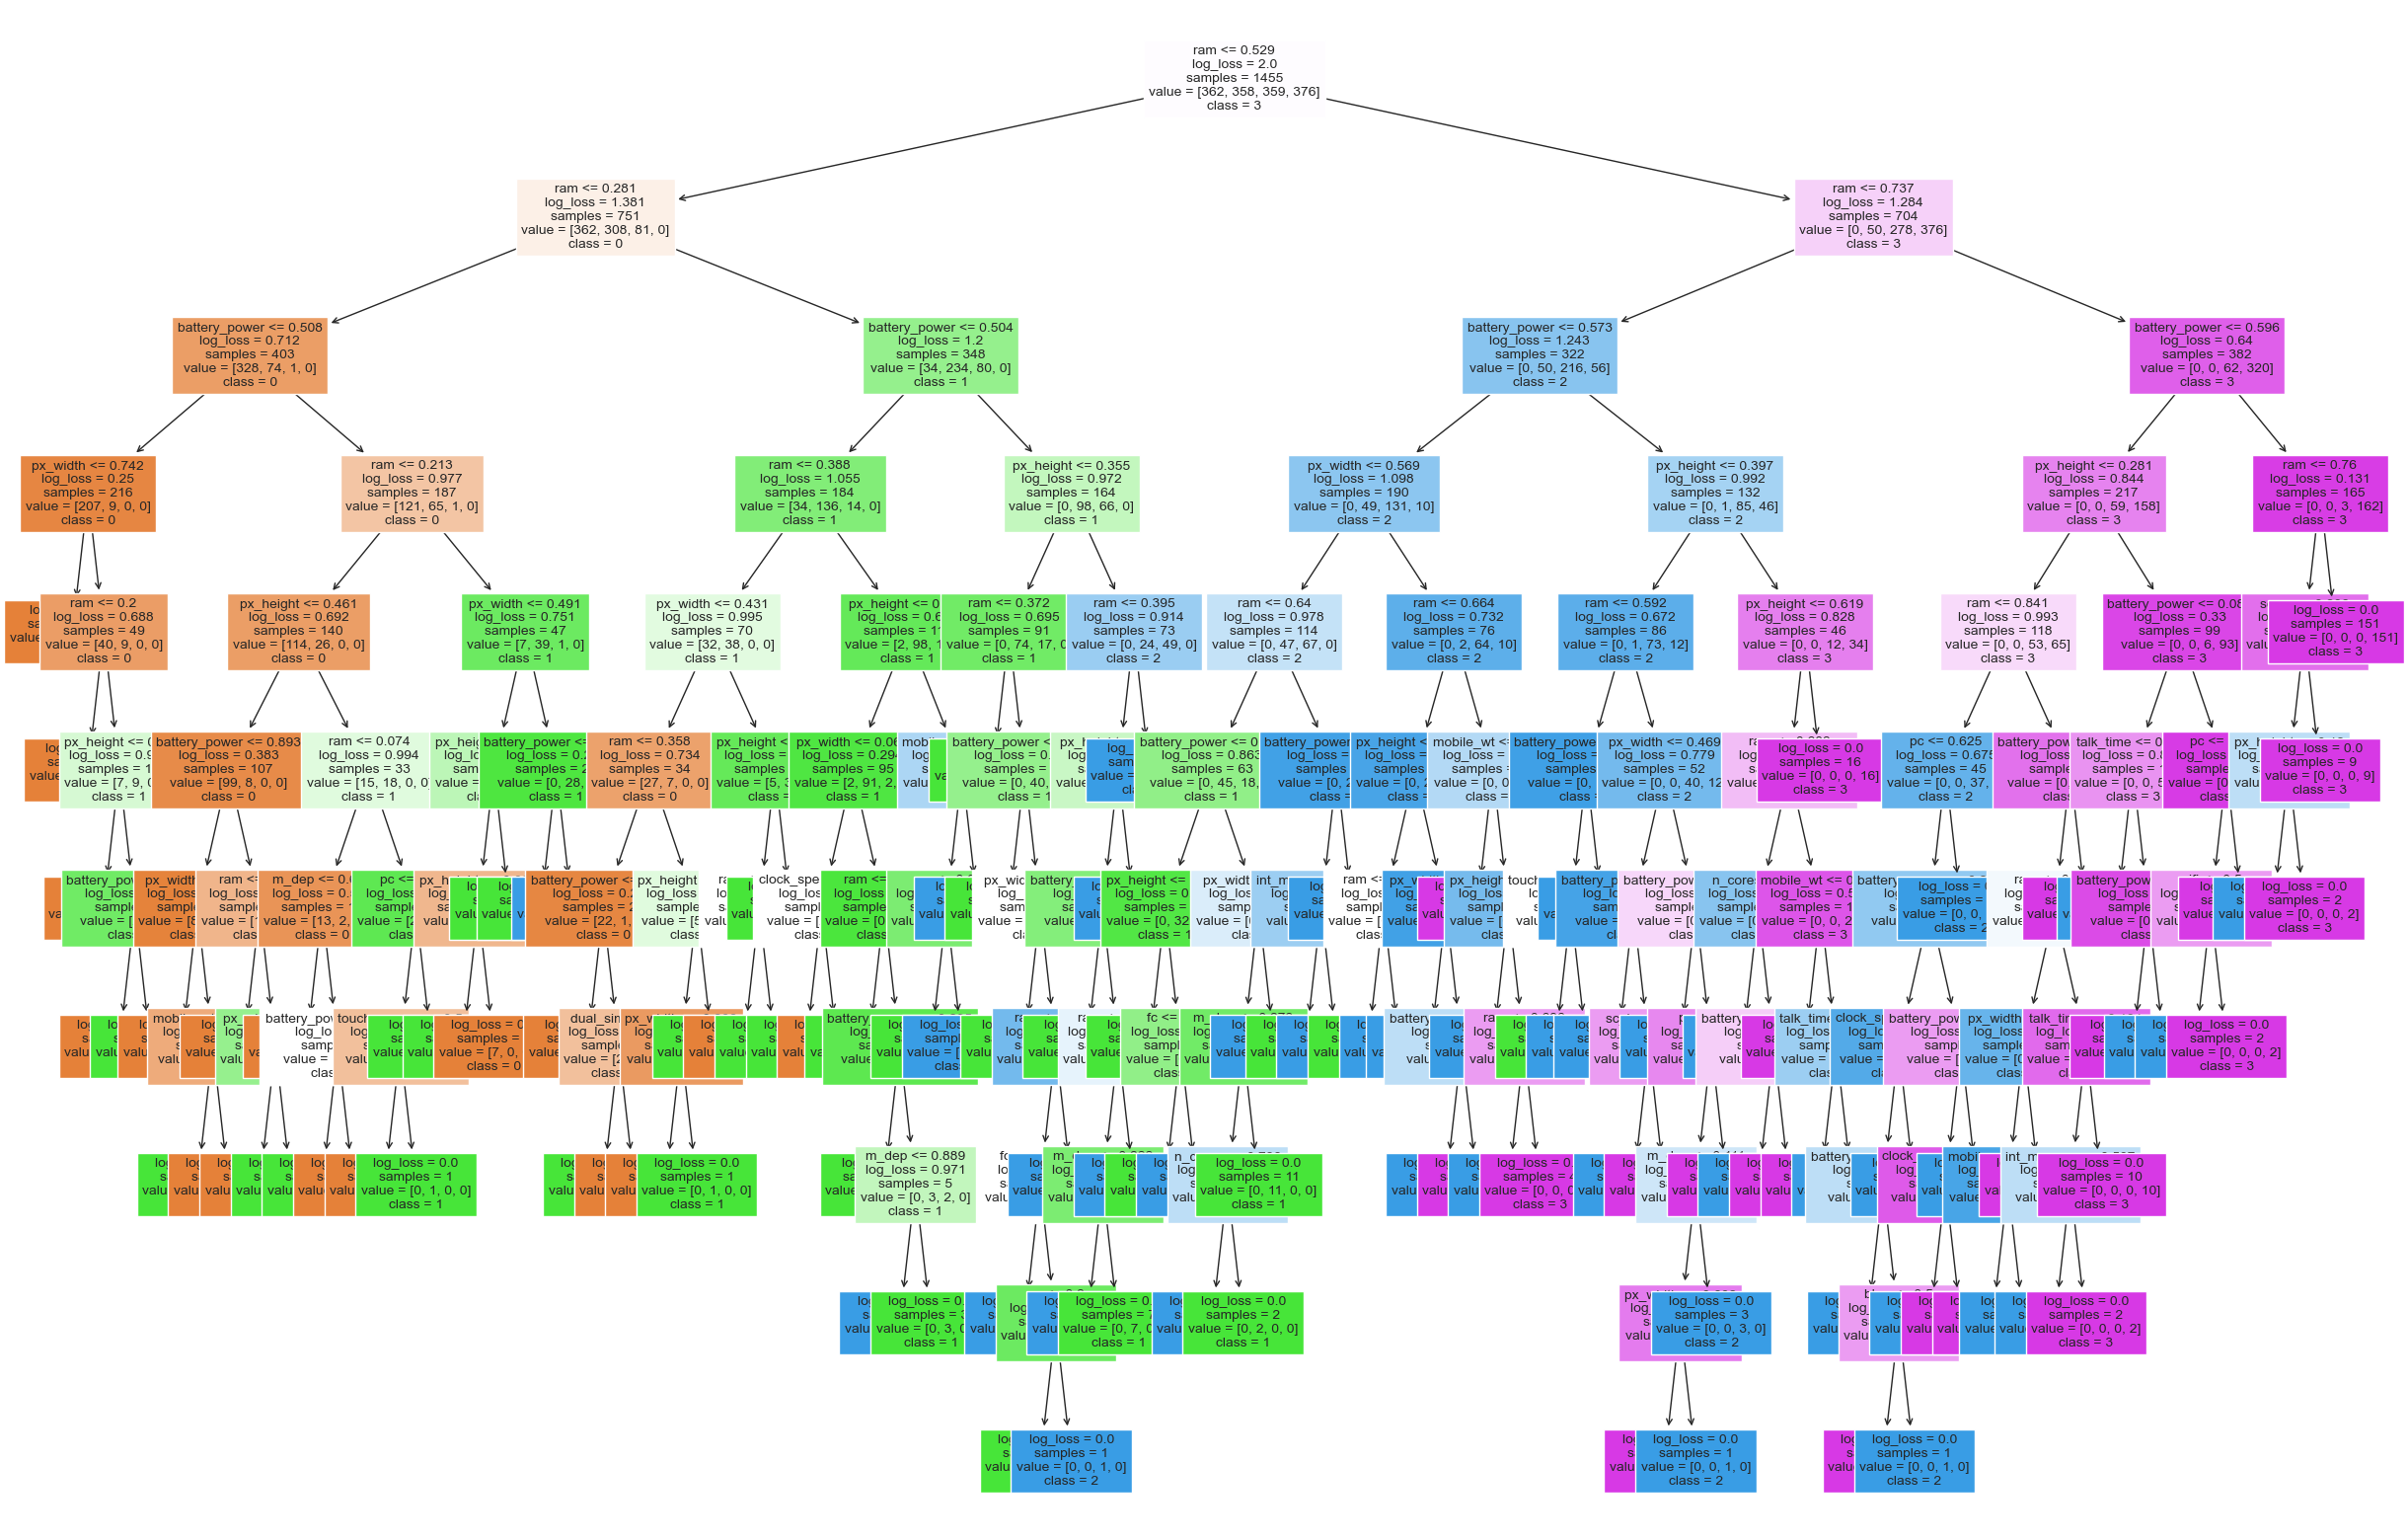

In [40]:
feature_names = ['battery_power' , 'blue', 'clock_speed','dual_sim', 'fc', 'four_g', 
                 'int_memory','m_dep', 'mobile_wt' ,'n_cores', 'pc' , 'px_height' , 'px_width' , 
                 'ram' , 'sc_h', 'sc_w','talk_time', 'three_g', 'touch_screen' , 'wifi' ]
target_names = ['0', '1', '2', '3']
fig = plt.figure (figsize = (30,20))
plot = tree.plot_tree(DT,feature_names = feature_names, class_names = target_names, filled = True, fontsize = 10)
plt.show()

<div style="border-radius:10px; padding: 30px; background-color: #ff69b4; font-size:90%; text-align:left">
<p style="font-family:Georgia; font-size:300%;font-weight:bold;text-align:center;color:black;"> 🌳🌳🌳 Random Forest Algorithm 🌳🌳🌳 

In [45]:
import warnings 
warnings.filterwarnings('ignore')

# Prepare features and target variable
X2 = DF_cleaned.drop(columns=['price_range'])  # Drop just the target
y2 = DF_cleaned['price_range']

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
norm_x2 = scaler.fit_transform(X2)
X2_norm = pd.DataFrame(norm_x2, columns=list(X2.columns))

# Split data into training and testing sets
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2_norm, y2, test_size=0.2, random_state=43)

results2 = []

for num in range(10, 200):
    RF = RandomForestClassifier(n_estimators=num, criterion='entropy', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
                                bootstrap=True, oob_score=False, n_jobs=None, random_state=None, 
                                verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, 
                                max_samples=None)
    RF.fit(x_train2, y_train2)
    y_pred2 = RF.predict(x_test2)
    
    
    # Metrics
    accuracy = metrics.accuracy_score(y_test2, y_pred2)
    precision = metrics.precision_score(y_test2, y_pred2, average='weighted')
    recall = metrics.recall_score(y_test2, y_pred2, average='weighted')
    
    results2.append((num, accuracy, precision, recall))

# Convert results to DataFrame
results2_df = pd.DataFrame(results2, columns=['num_estimator', 'Accuracy', 'Precision', 'Recall'])

# Sort and display results
results2_df.sort_values(by='Accuracy', ascending=False, inplace=True)
results2_df.reset_index(drop=True, inplace=True)
display(results2_df)

# Print best result
print(f'The best result is for {results2_df["num_estimator"][0]} estimators which has an accuracy of {results2_df["Accuracy"][0]:.4f}')

num_estimator  Accuracy  Precision    Recall
0              123  0.923077   0.922524  0.923077
1              151  0.917582   0.917618  0.917582
2              107  0.917582   0.917264  0.917582
3              137  0.917582   0.917601  0.917582
4              113  0.917582   0.917533  0.917582
..             ...       ...        ...       ...
185             20  0.848901   0.847626  0.848901
186             12  0.837912   0.836445  0.837912
187             21  0.835165   0.836463  0.835165
188             15  0.832418   0.830716  0.832418
189             11  0.826923   0.824249  0.826923

[190 rows x 4 columns]

The best result is for 123 estimators which has an accuracy of 0.9231


<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">

**Make the best RF algorithm based on the optimized number of estimators (Trees)**

In [46]:
import warnings 
warnings.filterwarnings('ignore')

# Prepare features and target variable
X2rf = DF_cleaned.drop(columns=['price_range'])  # Drop just the target
y2rf = DF_cleaned['price_range']

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
norm_x2rf = scaler.fit_transform(X2rf)
X2rf_norm = pd.DataFrame(norm_x2rf, columns=list(X2rf.columns))

# Split data into training and testing sets
x_train2rf, x_test2rf, y_train2rf, y_test2rf = train_test_split(X2rf_norm, y2rf, test_size=0.2, random_state=43)

RF_best = RandomForestClassifier(n_estimators=123, criterion='entropy', max_depth=4, 
                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
                                bootstrap=True, oob_score=False, n_jobs=None, random_state=None, 
                                verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, 
                                max_samples=None)
RF_best.fit(x_train2rf, y_train2rf)
y_pred2rf = RF_best.predict(x_test2rf)

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:centre" > 

<p style="font-family:Georgia; font-size:200%;font-weight:bold;text-align:center;color:black;"> Random Forest Visulaization 👀 </p>  


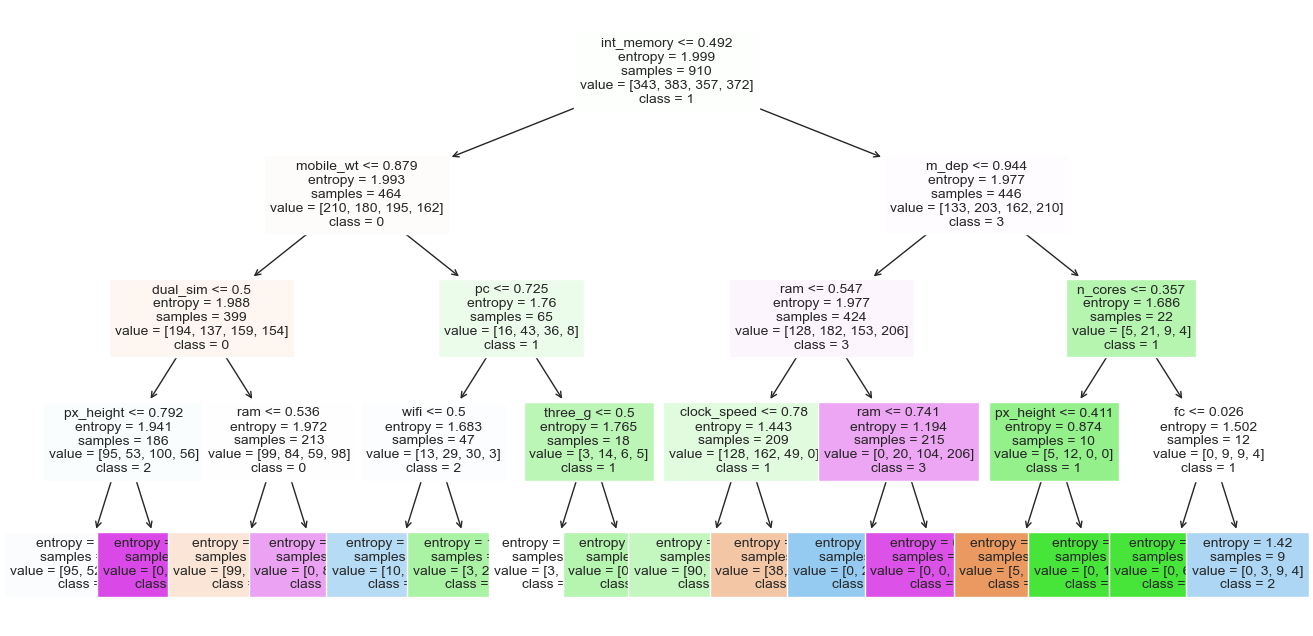

In [47]:
from sklearn.tree import plot_tree
# Select one tree from the forest
tree_index = 0  # You can choose any index, here we select the first tree
single_tree = RF_best.estimators_[tree_index]

# Feature and target names
feature_names_RF = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 
                    'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 
                    'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
target_names_RF = ['0', '1', '2', '3']

# Plotting the decision tree
fig = plt.figure(figsize=(16, 8))
plot = plot_tree(single_tree, feature_names=feature_names_RF, class_names=target_names_RF, filled=True, fontsize=10)
plt.show()

<div style="border-radius:10px; padding: 30px; background-color: #ff69b4; font-size:90%; text-align:left">
<p style="font-family:Georgia; font-size:270%;font-weight:bold;text-align:center;color:black;"> 📈 SVM (Support Vector Machine) Algorithm 📈 

In [48]:
import warnings 
warnings.filterwarnings('ignore')

# Prepare features and target variable
X3 = DF_cleaned.drop(columns=['price_range'])  # Drop just the target
y3 = DF_cleaned['price_range']

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
norm_x3 = scaler.fit_transform(X3)
X3_norm = pd.DataFrame(norm_x3, columns=list(X3.columns))

# Split data into training and testing sets
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3_norm, y3, test_size=0.2, random_state=43)

# Define the kernels and the range of C values
list_of_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C_values = [0.01, 0.1, 1, 10, 100]

results3 = []

for krnl in list_of_kernels:
    for C_value in C_values:
        SVM = SVC(C=C_value, kernel=krnl, degree=3, gamma='scale', 
                  coef0=0.0, shrinking=True, probability=False, 
                  tol=0.001, cache_size=200, class_weight=None, 
                  verbose=False, max_iter=-1, decision_function_shape='ovr', 
                  break_ties=False, random_state=None)
        SVM.fit(x_train3, y_train3)
        y_pred3 = SVM.predict(x_test3)
        
        # Metrics
        accuracy = metrics.accuracy_score(y_test3, y_pred3)
        precision = metrics.precision_score(y_test3, y_pred3, average='weighted')
        recall = metrics.recall_score(y_test3, y_pred3, average='weighted')
        
        results3.append((krnl, C_value, accuracy, precision, recall))

# Convert results to DataFrame
results3_df = pd.DataFrame(results3, columns=['Kernel Type', 'C Value', 'Accuracy', 'Precision', 'Recall'])

# Sort and display results
results3_df.sort_values(by='Accuracy', ascending=False, inplace=True)
results3_df.reset_index(drop=True, inplace=True)
display(results3_df)

# Print best result
best_result = results3_df.iloc[0]
print(f'The best result is for {best_result["Kernel Type"]} kernel with C={best_result["C Value"]} which has an accuracy of {best_result["Accuracy"]:.4f}')


Kernel Type  C Value  Accuracy  Precision    Recall
0       linear   100.00  0.969780   0.969814  0.969780
1       linear    10.00  0.961538   0.961801  0.961538
2       linear     1.00  0.950549   0.950933  0.950549
3       linear     0.10  0.917582   0.918138  0.917582
4         poly     0.10  0.873626   0.874819  0.873626
5          rbf     1.00  0.873626   0.872859  0.873626
6         poly    10.00  0.868132   0.866697  0.868132
7         poly     1.00  0.868132   0.868727  0.868132
8         poly   100.00  0.868132   0.866697  0.868132
9          rbf    10.00  0.862637   0.861472  0.862637
10         rbf   100.00  0.859890   0.858472  0.859890
11        poly     0.01  0.708791   0.730621  0.708791
12         rbf     0.10  0.585165   0.522565  0.585165
13      linear     0.01  0.497253   0.321541  0.497253
14     sigmoid     0.10  0.326923   0.163789  0.326923
15     sigmoid     1.00  0.233516   0.114425  0.233516
16     sigmoid    10.00  0.233516   0.245415  0.233516
17         rbf     0.01  0.233516   0.054530  0.233516
18     sigmoid     0.01  0.233516   0.054530  0.233516
19     sigmoid   100.00  0.233516   0.378339  0.233516

The best result is for linear kernel with C=100.0 which has an accuracy of 0.9698


<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:centre" > 

<p style="font-family:Georgia; font-size:200%;font-weight:bold;text-align:center;color:black;"> SVM Visulaization 👀 </p> 



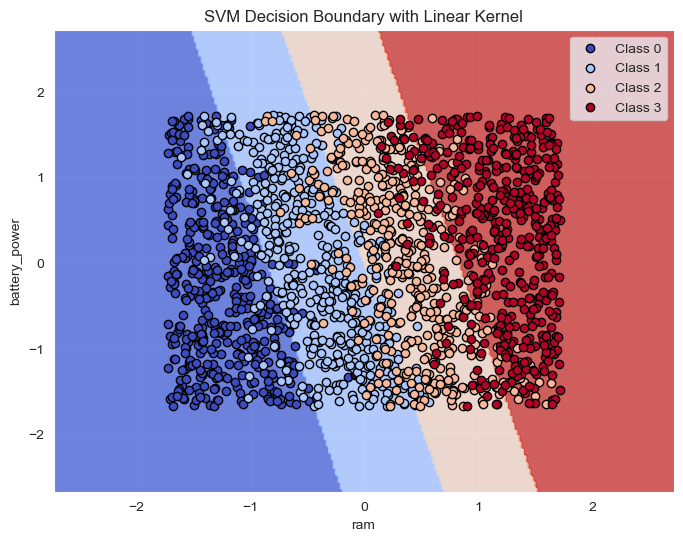

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Prepare features and target variable
X = DF_cleaned[['ram', 'battery_power']].values  # for simplicity 
y = DF_cleaned['price_range'].values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the SVM model
model = SVC(kernel='linear', C=10)
model.fit(X_scaled, y)

# Create a mesh to plot the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the decision boundary
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Define the unique classes and their corresponding colors
unique_classes = np.unique(y)
colors = plt.cm.coolwarm(np.linspace(0, 1, len(unique_classes)))

# Plot the data points with labels
for class_value, color in zip(unique_classes, colors):
    idx = np.where(y == class_value)
    plt.scatter(X_scaled[idx, 0], X_scaled[idx, 1], c=[color], edgecolors='k', marker='o', label=f'Class {class_value}')

# Add a legend
plt.legend()

plt.title('SVM Decision Boundary with Linear Kernel')
plt.xlabel('ram')
plt.ylabel('battery_power')
plt.show()


<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">
    
  **Optimized SVM model classification on data, showing a good boundaries between price classes**

In [53]:
import warnings 
warnings.filterwarnings('ignore')

# Prepare features and target variable
X3 = DF_cleaned.drop(columns=['price_range'])  # Drop just the target
y3 = DF_cleaned['price_range']

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
norm_x3 = scaler.fit_transform(X3)
X3_norm = pd.DataFrame(norm_x3, columns=list(X3.columns))

# Split data into training and testing sets
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3_norm, y3, test_size=0.2, random_state=43)

SVM_best = SVC(C=10, kernel='linear', degree=3, gamma='scale', 
                  coef0=0.0, shrinking=True, probability=False, 
                  tol=0.001, cache_size=200, class_weight=None, 
                  verbose=False, max_iter=-1, decision_function_shape='ovr', 
                  break_ties=False, random_state=None)
SVM_best.fit(x_train3, y_train3)
y_pred3_best = SVM_best.predict(x_test3)


In [55]:
k_fold = KFold (4)
print (cross_val_score (SVM_best, X3, y3.ravel(), cv = k_fold, n_jobs = 1))

[0.97802198 0.96703297 0.97802198 0.96696035]


<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">
    Cross Validation will not improve the model prediction very much, as the data sections are in the same range

<div style="border-radius:10px; padding: 30px; background-color: #ff69b4; font-size:90%; text-align:left">
<p style="font-family:Georgia; font-size:300%;font-weight:bold;text-align:center;color:black;"> 🎯 Reporting the Results, Models' Accuracies


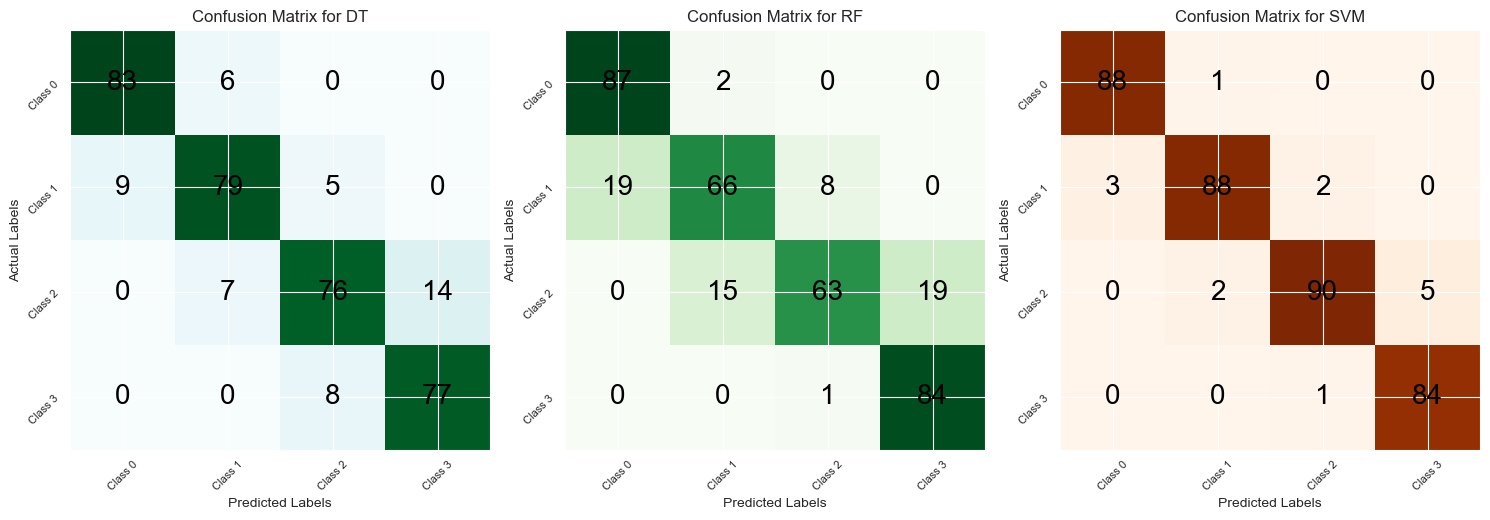

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrices
cm_DT_best = confusion_matrix(y_test_DT_best, y_pred_DT_best)
cm_RF_best = confusion_matrix(y_test2rf, y_pred2rf)
cm_SVM_best = confusion_matrix(y_test3, y_pred3_best)

# Plotting with Seaborn's dark grid style
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot for Decision Tree
im = ax[0].imshow(cm_DT_best, cmap='BuGn')

# Set ticks and labels
num_classes = cm_DT_best.shape[0]
class_labels = ['Class {}'.format(i) for i in range(num_classes)]

ax[0].set_xticks(range(num_classes))
ax[0].set_xticklabels(class_labels, fontsize=8, rotation=45)
ax[0].set_yticks(range(num_classes))
ax[0].set_yticklabels(class_labels, fontsize=8, rotation=45)

# Add annotations
for i in range(num_classes):
    for j in range(num_classes):
        ax[0].text(j, i, cm_DT_best[i, j], ha='center', va='center', color='black', fontsize=20)

# Label axes and title
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('Actual Labels')
ax[0].set_title('Confusion Matrix for DT')

# Plot for Random Forest
im = ax[1].imshow(cm_RF_best, cmap='Greens')

# Set ticks and labels
num_classes = cm_RF_best.shape[0]
class_labels = ['Class {}'.format(i) for i in range(num_classes)]

ax[1].set_xticks(range(num_classes))
ax[1].set_xticklabels(class_labels, fontsize=8, rotation=45)
ax[1].set_yticks(range(num_classes))
ax[1].set_yticklabels(class_labels, fontsize=8, rotation=45)

# Add annotations
for i in range(num_classes):
    for j in range(num_classes):
        ax[1].text(j, i, cm_RF_best[i, j], ha='center', va='center', color='black', fontsize=20)

# Label axes and title
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('Actual Labels')
ax[1].set_title('Confusion Matrix for RF')

# Plot for SVM
im = ax[2].imshow(cm_SVM_best, cmap='Oranges')

# Set ticks and labels
num_classes = cm_SVM_best.shape[0]
class_labels = ['Class {}'.format(i) for i in range(num_classes)]

ax[2].set_xticks(range(num_classes))
ax[2].set_xticklabels(class_labels, fontsize=8, rotation=45)
ax[2].set_yticks(range(num_classes))
ax[2].set_yticklabels(class_labels, fontsize=8, rotation=45)

# Add annotations
for i in range(num_classes):
    for j in range(num_classes):
        ax[2].text(j, i, cm_SVM_best[i, j], ha='center', va='center', color='black', fontsize=20)

# Label axes and title
ax[2].set_xlabel('Predicted Labels')
ax[2].set_ylabel('Actual Labels')
ax[2].set_title('Confusion Matrix for SVM')

# Adjust layout and display plot
plt.tight_layout()
plt.show()


In [72]:
algrthms = {
    'Report': ['Model Accuracy'],  
    'DT': ['0.87'], 
    'RF': ['0.923'],
    'SVM': ['0.961'],
    
}

Report_Table = pd.DataFrame(algrthms)
Report_Table 

Report    DT     RF    SVM
0  Model Accuracy  0.87  0.923  0.961

<div style="border-radius:10px; padding: 30px; background-color: #ff69b4; font-size:90%; text-align:left">
<p style="font-family:Georgia; font-size:300%;font-weight:bold;text-align:center;color:black;"> 🤖 Predicting Unseen Data
  

In [73]:
test_data = pd.read_csv ('test.csv')              #reading the testing dataset 

In [58]:
df_test= pd.DataFrame (test_data)              
df_test.describe()

id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300000     1.000000   
max    1000.000000    1999.000000     1.000000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep   mobile_wt  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean      4.593000     0.487000    33.652000     0.517500   139.51100  ...   
std       4.463325     0.500081    18.128694     0.280861    34.85155  ...   
min       0.000000     0.000000     2.000000     0.100000    80.00000  ...   
25%       1.000000     0.000000    18.000000     0.300000   109.75000  ...   
50%       3.000000     0.000000    34.500000     0.500000   139.00000  ...   
75%       7.000000     1.000000    49.000000     0.800000   170.00000  ...   
max      19.000000     1.000000    64.000000     1.000000   200.00000  ...   

                pc    px_height     px_width          ram         sc_h  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.054000   627.121000  1239.774000  2138.998000    11.995000   
std       6.095099   432.929699   439.670981  1088.092278     4.320607   
min       0.000000     0.000000   501.000000   263.000000     5.000000   
25%       5.000000   263.750000   831.750000  1237.250000     8.000000   
50%      10.000000   564.500000  1250.000000  2153.500000    12.000000   
75%      16.000000   903.000000  1637.750000  3065.500000    16.000000   
max      20.000000  1907.000000  1998.000000  3989.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  
count  1000.000000  1000.000000  1000.000000    1000.00000  1000.000000  
mean      5.316000    11.085000     0.756000       0.50000     0.507000  
std       4.240062     5.497636     0.429708       0.50025     0.500201  
min       0.000000     2.000000     0.000000       0.00000     0.000000  
25%       2.000000     6.750000     1.000000       0.00000     0.000000  
50%       5.000000    11.000000     1.000000       0.50000     1.000000  
75%       8.000000    16.000000     1.000000       1.00000     1.000000  
max      18.000000    20.000000     1.000000       1.00000     1.000000  

[8 rows x 21 columns]

**Test Data Preprocessing**

In [59]:
df2 = df_test[df_test['sc_w'] == 0 ]
df3 = df_test[df_test['px_height'] == 0]

# Combine conditions into a single boolean mask
condition = (df_test['sc_w'] == 0) | (df_test['px_height'] == 0)

# Drop rows matching the condition
DF_test = df_test[~condition]
DF_test.reset_index(drop=True, inplace=True)
DF_test.drop(columns=['id'], inplace=True)
DF_test['price_range'] = 0
DF_test

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1             1807     1          2.8         0   1       0          27   
2             1434     0          1.4         0  11       1          49   
3             1464     1          2.9         1   5       1          50   
4             1718     0          2.4         0   1       0          47   
..             ...   ...          ...       ...  ..     ...         ...   
881            936     1          1.4         1   0       0          46   
882           1700     1          1.9         0   0       1          54   
883            609     0          1.8         1   0       0          13   
884           1533     1          0.5         1   0       0          50   
885           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193        3  ...        226      1412  3476    12     7   
1      0.9        186        3  ...       1270      1366  2396    17    10   
2      0.5        108        6  ...        749       810  1773    15     8   
3      0.8        198        8  ...        569       939  3506    10     7   
4      1.0        156        2  ...       1283      1374  3873    14     2   
..     ...        ...      ...  ...        ...       ...   ...   ...   ...   
881    0.8        139        2  ...        265       886   684     8     5   
882    0.5        170        7  ...        644       913  2121    14     8   
883    0.9        186        4  ...       1152      1632  1933     8     1   
884    0.4        171        2  ...         38       832  2509    15    11   
885    0.1        140        6  ...        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  price_range  
0            2        0             1     0            0  
1           10        0             1     1            0  
2            7        1             0     1            0  
3            3        1             1     1            0  
4           10        0             0     0            0  
..         ...      ...           ...   ...          ...  
881         12        1             1     1            0  
882         15        1             1     0            0  
883         19        0             1     1            0  
884          6        0             1     0            0  
885          3        1             0     1            0  

[886 rows x 21 columns]

In [60]:
DF_cleaned

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1814            794     1          0.5         1   0       1           2   
1815           1965     1          2.6         1   0       0          39   
1816           1911     0          0.9         1   1       1          36   
1817           1512     0          0.9         0   4       1          46   
1818            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1814    0.8        106        6  ...       1222      1890   668    13     4   
1815    0.2        187        4  ...        915      1965  2032    11    10   
1816    0.7        108        8  ...        868      1632  3057     9     1   
1817    0.1        145        5  ...        336       670   869    18    10   
1818    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1814         19        1             1     0            0  
1815         16        1             1     1            2  
1816          5        1             1     0            3  
1817         19        1             1     1            0  
1818          2        1             1     1            3  

[1819 rows x 21 columns]

In [61]:
Dataset = pd.concat([DF_cleaned, DF_test], ignore_index=True)   # Addition of the new data to the previous dataset (With target)
Dataset

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
2700            936     1          1.4         1   0       0          46   
2701           1700     1          1.9         0   0       1          54   
2702            609     0          1.8         1   0       0          13   
2703           1533     1          0.5         1   0       0          50   
2704           1270     1          0.5         0   4       1          35   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
2700    0.8        139        2  ...        265       886   684     8     5   
2701    0.5        170        7  ...        644       913  2121    14     8   
2702    0.9        186        4  ...       1152      1632  1933     8     1   
2703    0.4        171        2  ...         38       832  2509    15    11   
2704    0.1        140        6  ...        457       608  2828     9     2   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
2700         12        1             1     1            0  
2701         15        1             1     0            0  
2702         19        0             1     1            0  
2703          6        0             1     0            0  
2704          3        1             0     1            0  

[2705 rows x 21 columns]

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">
    
  **Slicing and splitting the new train-test data**

In [83]:

# Splitting the data into training and testing sets
train = Dataset.iloc[:1818]  # Slicing for training data
test = Dataset.iloc[1819:]   # Slicing for testing data

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform scaler on training data
norm_train = scaler.fit_transform(train.drop(columns=['price_range']))
norm_train_df = pd.DataFrame(norm_train, columns=train.drop(columns=['price_range']).columns)

# Transform testing data using the fitted scaler from training data
norm_test = scaler.transform(test.drop(columns=['price_range']))
norm_test_df = pd.DataFrame(norm_test, columns=test.drop(columns=['price_range']).columns)

# Splitting the training data into features (x) and target (y)
x__train = norm_train_df
y__train = train['price_range']

# Splitting the testing data into features (x) and target (y)
x__test = norm_test_df
y__test = test['price_range']


<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">
    
  **Predicting by the optimized algorithms** 

In [84]:
DT_best.fit (x__train, y__train)     # fit and prediction of data by DT 
y_DT = DT_best.predict (x__test)

RF_best.fit (x__train, y__train)     # fit and prediction of data by RF 
y_RF = RF_best.predict (x__test)

SVM_best.fit (x__train, y__train)    # fit and prediction of data by SVM 
y_SVM = SVM_best.predict (x__test)

In [85]:
DF_asked = DF_test.copy ()
DF_asked.drop(columns=['price_range'], inplace=True)

DF_asked['DT predicted price'] = y_DT
DF_asked['RF predicted price'] = y_RF
DF_asked['SVM predicted price'] = y_SVM


# Display the updated DataFrame
display(DF_asked)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1             1807     1          2.8         0   1       0          27   
2             1434     0          1.4         0  11       1          49   
3             1464     1          2.9         1   5       1          50   
4             1718     0          2.4         0   1       0          47   
..             ...   ...          ...       ...  ..     ...         ...   
881            936     1          1.4         1   0       0          46   
882           1700     1          1.9         0   0       1          54   
883            609     0          1.8         1   0       0          13   
884           1533     1          0.5         1   0       0          50   
885           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  ...   ram  sc_h  sc_w  talk_time  three_g  \
0      0.1        193        3  ...  3476    12     7          2        0   
1      0.9        186        3  ...  2396    17    10         10        0   
2      0.5        108        6  ...  1773    15     8          7        1   
3      0.8        198        8  ...  3506    10     7          3        1   
4      1.0        156        2  ...  3873    14     2         10        0   
..     ...        ...      ...  ...   ...   ...   ...        ...      ...   
881    0.8        139        2  ...   684     8     5         12        1   
882    0.5        170        7  ...  2121    14     8         15        1   
883    0.9        186        4  ...  1933     8     1         19        0   
884    0.4        171        2  ...  2509    15    11          6        0   
885    0.1        140        6  ...  2828     9     2          3        1   

     touch_screen  wifi  DT predicted price  RF predicted price  \
0               1     0                   3                   3   
1               1     1                   3                   3   
2               0     1                   1                   1   
3               1     1                   3                   3   
4               0     0                   3                   3   
..            ...   ...                 ...                 ...   
881             1     1                   0                   0   
882             1     0                   2                   1   
883             1     1                   1                   1   
884             1     0                   2                   2   
885             0     1                   2                   2   

     SVM predicted price  
0                      3  
1                      2  
2                      1  
3                      3  
4                      3  
..                   ...  
881                    0  
882                    2  
883                    1  
884                    2  
885                    2  

[886 rows x 23 columns]


<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">

<p style="font-family:Georgia; font-size:250%;font-weight:bold;text-align:left;color:black"> Conclusion </p>
    
    
    

    
    
    
    
    
    
    
    
    
    
**The last three rows in the asking data show the price prediction using different algorithms:**

1- The best prediction is for SVM model with the maximum accuracy. 

2- The second model is the RF with number of 123 trees. 

3- The last model is the DT with accuracy of 0.87 at the best condition. 